In [90]:
from gensim.test.utils import datapath
import pandas as pd
import gensim.models

class TweetCorpusWithStops(object):
    """An interator that yields sentences (lists of str)."""
            
    def __iter__(self, filename="../data/processed_all_stops_included.csv"):
        df = pd.read_csv(filename)
        for i in range(len(df)):
            line = str(df['text'][i])
            split = line.split()
            yield split
            
class TweetCorpusNoStops(object):
    """An interator that yields sentences (lists of str)."""
            
    def __iter__(self, filename="../data/processed_all_stops_removed.csv"):
        df = pd.read_csv(filename)
        for i in range(len(df)):
            line = str(df['text'][i])
            split = line.split()
            yield split
            
#sentences = TweetCorpus()
#model = gensim.models.Word2Vec(sentences=sentences, window=1, iter=1, size=1, min_count=5000, sg=0)
#accuracy = model.wv.accuracy('../word2vec/questions-words.txt')

In [99]:
def test_with_stops():
    window_size_list = [1,1,20] 
    vector_size_list = [1,1,600] 
    noise_words_list = [1,1,20] 
    iters_list = [1, 1, 100]
    cbows = [True,False]
    sentences = TweetCorpusWithStops()
    cols = ['model','capital-common-countries', 'capital-world', 'currency', 'city-in-state', 'family', 'gram1-adjective-to-adverb', 'gram2-opposite', 'gram3-comparative']
    results_df = pd.DataFrame(columns=cols)

    
    for a in window_size_list:
        for b in vector_size_list:
            for c in noise_words_list:
                for d in iters_list:
                    for cbow in cbows:
                        
                        run_name = "with_stops_cbow_"+str(cbow)+"_window_"+str(a)+"_size_"+str(b)+"_noise_"+str(c)+"_iters_"+str(d)
                        print("Running test for", run_name)
                        if cbow:
                            model = gensim.models.Word2Vec(sentences=sentences, window=a, sample=0.00001, iter=d, size=b, min_count=3, sg=0, negative=c)
                        else:
                            model = gensim.models.Word2Vec(sentences=sentences, window=a, sample=0.00001, iter=d, size=b, min_count=3, sg=1, hs=0, negative=c)
                        print("Calculating accuracy")
                        accuracy = model.wv.accuracy('questions-words.txt', restrict_vocab=80000)
                        total = 0
                        correct = 0
                        accs = [run_name]
                        for i in range(8): 
                            total += len(accuracy[i]['correct']) + len(accuracy[i]['incorrect'])
                            correct += len(accuracy[i]['correct'])
                            denom = len(accuracy[i]['correct']) + len(accuracy[i]['incorrect'])
                            if denom == 0:
                                cat_acc = 0
                            else:
                                cat_acc = len(accuracy[i]['correct']) / denom
                            accs.append(cat_acc)
                        res_row = pd.DataFrame([accs],columns=cols)
                        results_df = results_df.append(res_row)

                        accuracy = correct / total
                        fname = "with_stops_cbow_"+str(cbow)+"_window_"+str(a)+"_size_"+str(b)+"_noise_"+str(c)+"_iters_"+str(d)+"_accuracy_"+str(accuracy)+".kv"
                        print("Accuracy:", accuracy, "For:", fname)
                        results_df.to_csv('with_stops_results.csv')
                        model.wv.save_word2vec_format('vectors/'+fname)
    
test_with_stops()

Running test for with_stops_cbow_True_window_1_size_1_noise_1_iters_1
Calculating accuracy


/Users/juliushietala/anaconda3/envs/snlp_env/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).


Accuracy: 0.0 For: with_stops_cbow_True_window_1_size_1_noise_1_iters_1_accuracy_0.0.kv


FileNotFoundError: [Errno 2] No such file or directory: 'vectors/with_stops_cbow_True_window_1_size_1_noise_1_iters_1_accuracy_0.0.kv'

In [ ]:
print(model.wv.most_similar(positive=['fashion'], topn=5))
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    print("start iter")
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)
    print("end iter")
    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    print("start tsne")
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)
    print("end tsne")

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)


def plot_with_matplotlib(x_vals, y_vals, labels):
    print("Using matplotlib")
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

plot_function = plot_with_matplotlib


plot_function(x_vals, y_vals, labels)

In [1]:
import pandas as pd
df_with_stops = pd.read_csv("../data/processed_all_stops_included.csv")
df_no_stops = pd.read_csv("../data/processed_all_stops_removed.csv")

In [2]:
df_with_stops.head()

,target,text
0,0,awww that s a bummer you shoulda got david car...
1,0,is upset that he can t update his facebook by ...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no it s not behaving at all i m mad why am i h...


In [3]:
df_no_stops.head()

,target,text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many times ball managed save 50 rest go ...
3,0,whole body feels itchy like fire
4,0,behaving mad see


In [4]:
df_with_stops['length'] = df_with_stops.text.apply(lambda x: len(x.split()))
df_no_stops['length'] = df_no_stops.text.apply(lambda x: len(x.split()))

In [5]:
df_with_stops.head()


,target,text,length
0,0,awww that s a bummer you shoulda got david car...,17
1,0,is upset that he can t update his facebook by ...,22
2,0,i dived many times for the ball managed to sav...,17
3,0,my whole body feels itchy and like its on fire,10
4,0,no it s not behaving at all i m mad why am i h...,23


In [6]:
df_no_stops.head()

,target,text,length
0,0,awww bummer shoulda got david carr third day,8
1,0,upset update facebook texting might cry result...,11
2,0,dived many times ball managed save 50 rest go ...,10
3,0,whole body feels itchy like fire,6
4,0,behaving mad see,3


In [7]:
import matplotlib.pyplot as plt
import numpy as np

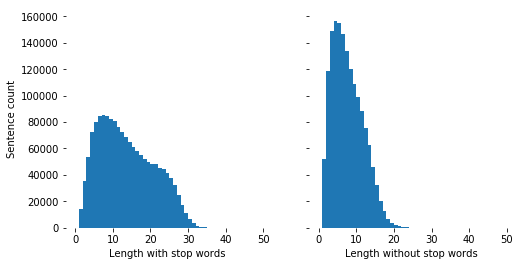

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4), sharey=True)

ax1.set(ylabel='Sentence count')


ax1.hist(df_with_stops.length, bins=range(50))
ax1.set_xlabel("Length with stop words", fontsize = 10)
ax1.set(frame_on=False)
ax2.hist(df_no_stops.length, bins=range(50));
ax2.set_xlabel("Length without stop words", fontsize = 10)
ax2.set(frame_on=False)

plt.show()

In [10]:
from collections import Counter
from tqdm.auto import tqdm

no_stop_vocab = Counter()
no_stop_total_words = 0
for sentence in tqdm(df_no_stops.text):
    no_stop_vocab.update(word for word in sentence.split())
    no_stop_total_words += len(sentence.split())
    

        
with_stop_vocab = Counter()
with_stop_total_words = 0
for sentence in tqdm(df_with_stops.text):
    with_stop_vocab.update(word for word in sentence.split())
    with_stop_total_words += len(sentence.split())


Total words no stops 11535579


NameError: name 'with_stop_total_word' is not defined

In [11]:
print("Total words no stops", no_stop_total_words)
print("Total words with stops", with_stop_total_words)

Total words no stops 11535579
Total words with stops 21098146


In [36]:
print("No stops",len(no_stop_vocab.most_common()))
print("With stops",len(with_stop_vocab.most_common()))

No stops 335507
With stops 335660


In [47]:
no_stop_vocab_min_freq_3 = Counter(el for el in no_stop_vocab.elements() if no_stop_vocab[el] >= 3)
with_stop_vocab_min_freq_3 = Counter(el for el in with_stop_vocab.elements() if with_stop_vocab[el] >= 3)

In [48]:
print("No stops",len(no_stop_vocab_min_freq_3.most_common()))
print("With stops",len(with_stop_vocab_min_freq_3.most_common()))

No stops 81887
With stops 82039
